
**Table of Contents:**
* [About the Dataset](#1)
* [Importing Modules](#2)
* [Loading Data](#3)
* [EDA - Exploratory Data Analysis](#4)
* [Data Cleaning and Feature Engineering](#5)
* [Answering Questions](#6)
* [Bribes by Cities and States](#7)
* [Bribes by Department](#8)
* [Time Series Analysis](#9)
* [Conclusion - Summary](#10)
---

<a id="1"></a> 
# 1- About the Dataset

This dataset contains information about the bribes taken from public.
All the information in this dataset is submitted by public of India.
It contains information about department which did the corruption ,date, location, amount , views of their post and amount they were forced to give.
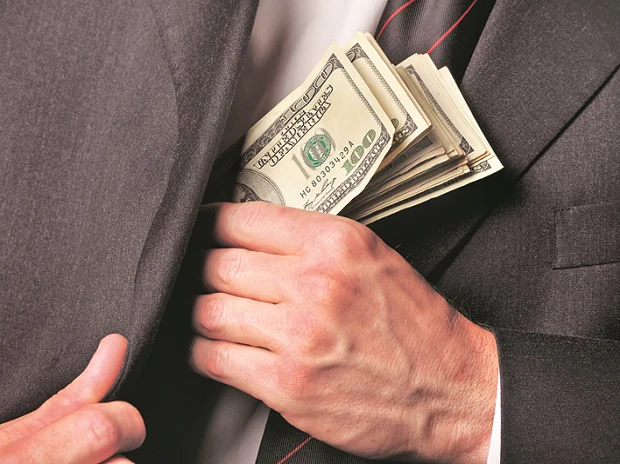

<a id="2"></a> 
# 2- Importing Modules 😀

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings('ignore')

<a id="3"></a> 
# 3- Loading the Data 📅

In [2]:
df=pd.read_csv('../input/corruption/data.csv',parse_dates=["Date"])

In [3]:
df.head()

,Title,Date,Location,Department,Views,Amount(INR)
0,They said it is registration fee for birth cer...,2020-10-14,"Bangalore,Karnataka","Births, Family and Care",1225,400
1,Paid bribe for not having insurance during pan...,2020-10-13,"Bangalore,Karnataka",Vehicle Insurance,1158,350
2,Forced to pay bribe at KR Puram RTO,2020-10-13,"Bangalore,Karnataka",Driving and Transport Business,1249,100
3,Forced to pay 100 rupees bribe for LL test,2020-10-13,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100
4,Misusing of power and traping people in false ...,2020-10-13,"Siwan,Bihar",FIR and Complaints,1068,15000


<a id="4"></a> 
# 4 - EDA | Let's Explore 👓

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Title        3473 non-null   object        
 1   Date         3473 non-null   datetime64[ns]
 2   Location     3473 non-null   object        
 3   Department   3429 non-null   object        
 4   Views        3473 non-null   int64         
 5   Amount(INR)  3473 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 162.9+ KB


In [5]:
r,c=df.shape
print('The dataset has ',r,' rows and ',c,' columns.' )

The dataset has  3473  rows and  6  columns.


In [6]:
df.describe()

,Views,Amount(INR)
count,3473.000000,3.473000e+03
mean,3379.405701,3.331083e+04
std,1540.854884,1.508203e+05
min,463.000000,1.000000e+00
25%,2081.000000,3.300000e+02
50%,3272.000000,1.200000e+03
75%,4522.000000,8.000000e+03
max,20450.000000,2.185000e+06


In [7]:
df.describe(include=object)

,Title,Location,Department
count,3473,3473,3429
unique,3282,510,367
top,Passport verification,"Bangalore,Karnataka",Others
freq,10,769,472


In [8]:
df.isnull().sum()

Title           0
Date            0
Location        0
Department     44
Views           0
Amount(INR)     0
dtype: int64

## Checking for nulls 🤔

In [9]:
df[df['Department'].isnull()].head()

,Title,Date,Location,Department,Views,Amount(INR)
34,I paid 500rs bribe for passport police verific...,2020-02-10,"NewDelhi,Delhi",NaN,1451,500
38,For clearing papers in survey for SRA,2020-09-25,"Mumbai,Maharashtra",NaN,1760,500000
74,I paid 500rs bribe for passport police verific...,2020-02-10,"NewDelhi,Delhi",NaN,1451,500
78,For clearing papers in survey for SRA,2020-09-25,"Mumbai,Maharashtra",NaN,1760,500000
144,Bribe taken by pollution office of Raipur (CG),2020-05-15,"Raipur,Chhattisgarh",NaN,1565,200000


In [10]:
df['Department'].fillna('Others',inplace=True)

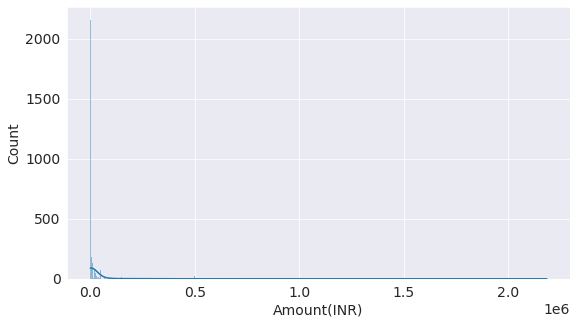

In [11]:
sns.histplot(df['Amount(INR)'],kde=True,bins=1000);
#data is highly skewed.

<a id="5"></a> 
# 5- Data Cleaning and Column Split 🤠

In [12]:
df['Amount(INR)'].quantile(0.90)

45363.200000000084

In [13]:
# Switching to only relevant data
df=df[df['Amount(INR)']<df['Amount(INR)'].quantile(0.90)]
#df

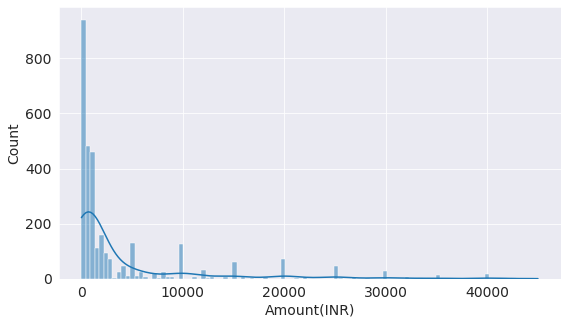

In [14]:
sns.histplot(df['Amount(INR)'],kde=True);

In [15]:
df.isnull().sum()

Title          0
Date           0
Location       0
Department     0
Views          0
Amount(INR)    0
dtype: int64

In [16]:
df.sample(5)

,Title,Date,Location,Department,Views,Amount(INR)
967,Paid for completing the process.,2019-03-30,"Kashipur,Uttarakhand",Pension Processing,1174,1000
2108,Delevery additional charge,2017-02-24,"Bangalore,Karnataka",Gas Cylinder Supply,6474,40
647,Vehicle Transfer/Purchase to Nashik,2019-07-26,"Nashik,Maharashtra",Driving and Transport Business,2416,6000
2303,Bribe for sale deed registration,2016-08-12,"Faizabad,UttarPradesh",Registration of Sale Deed,3329,10000
575,Paid to Patwari for Land Record Updates,2019-08-20,"Ambikapur,Chhattisgarh",Encumbrance Certificate,4714,5000


In [17]:
### Exploring
df.Department.unique()

array(['Births, Family and Care', 'Vehicle Insurance',
       'Driving and Transport Business', 'Driving Licenses and Tests',
       'FIR and Complaints', 'Policies and Procedures', 'Others',
       'Police Clearance Certificate', 'Registrations and Licenses',
       'Building and Housing', 'Traffic Fines, Penalties, Rules',
       'Excise', 'Property Registration', 'Loan Sanctioning',
       'Court Related', 'Verification and Certificates', 'Drugs License',
       'Visa', 'Khata', 'College Leaving Certificate', 'Tax and Permits',
       'Autorickshaws', 'Certificates', 'Caste Certificate',
       'Dates for Hearing', 'Aadhaar Card Process', 'Excess Baggage',
       'Traffic Violations', 'Bill Payment', 'Water Connection',
       'Passport Status and Delivery', 'Land Registration',
       'Government Personnel', 'Government Schemes', 'Loans',
       'Marriage Certificate and Registration', 'Police Harassment',
       'Background Verification', 'Services',
       'Change of Tariff in Do

In [18]:
df[['City','Province']]=df['Location'].str.split(',',expand=True)

In [19]:
df.head()

,Title,Date,Location,Department,Views,Amount(INR),City,Province
0,They said it is registration fee for birth cer...,2020-10-14,"Bangalore,Karnataka","Births, Family and Care",1225,400,Bangalore,Karnataka
1,Paid bribe for not having insurance during pan...,2020-10-13,"Bangalore,Karnataka",Vehicle Insurance,1158,350,Bangalore,Karnataka
2,Forced to pay bribe at KR Puram RTO,2020-10-13,"Bangalore,Karnataka",Driving and Transport Business,1249,100,Bangalore,Karnataka
3,Forced to pay 100 rupees bribe for LL test,2020-10-13,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100,Bangalore,Karnataka
4,Misusing of power and traping people in false ...,2020-10-13,"Siwan,Bihar",FIR and Complaints,1068,15000,Siwan,Bihar


### There is no correlation between views and amount.

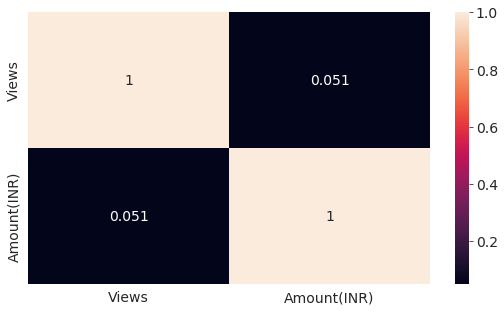

In [20]:
sns.heatmap(df.corr(), annot=True);

<a id="6"></a> 
# 6- Answering Questions 🕵️‍♂️

# Q7 -  Most Bribes are paid in which cities?

In [21]:
most_bribe_area=df.groupby(['City'])['Amount(INR)'].agg(['count','sum']).sort_values(by='count',ascending=False).head(10)

In [22]:
most_bribe_area

,count,sum
City,,
Bangalore,720,3659321
NewDelhi,210,626320
Chennai,142,664328
Pune,117,299812
Mumbai,101,512496
Hyderabad,85,400545
Adari,60,136136
Abhayapuri,47,56358
Achhnera,45,72771


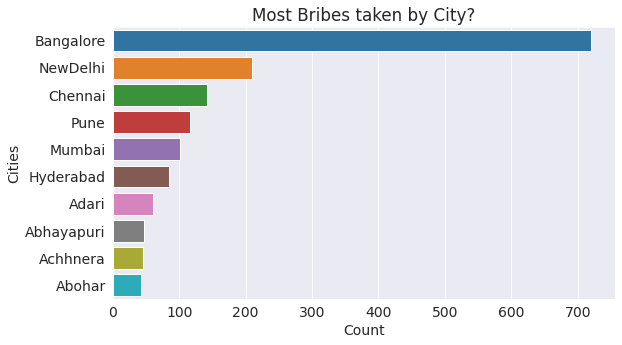

In [23]:
sns.barplot(y=most_bribe_area.index,x=most_bribe_area['count'])
plt.xlabel('Count')
plt.ylabel("Cities")
plt.title('Most Bribes taken by City?');
# Bangalore,Karnataka has the highest number of reported cases against bribery

### Q7-B- Most Bribes are paid in which states?

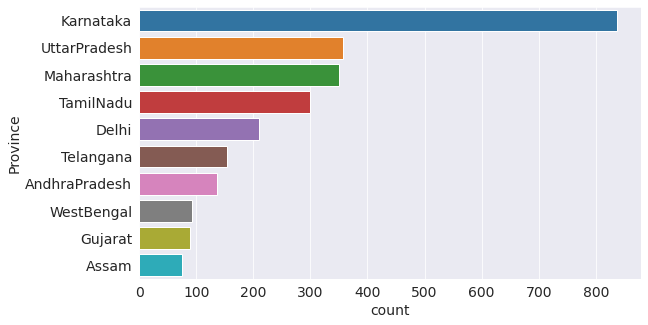

In [24]:
most_bribe_province=df.groupby(['Province'])['Amount(INR)'].agg(['count','sum']).sort_values(by='count',ascending=False).head(10)
sns.barplot(y=most_bribe_province.index,x=most_bribe_province['count']);

<a id="7"></a> 
# Q8- Which department gets paid the most bribe?

In [25]:
depart_freq=df.groupby('Department')['Amount(INR)'].agg(['count','sum']).sort_values(by='count',ascending=False).head(10)
#Traffic taking the top of lists

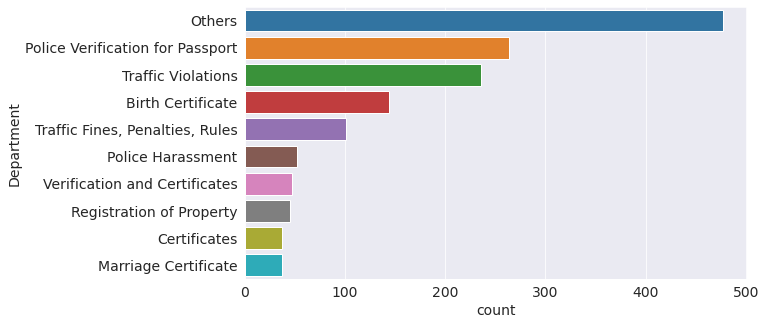

In [26]:
sns.barplot(y=depart_freq.index,x=depart_freq['count']);

- Traffic is higher as expected. Notice there are two bars of traffic.

**Departments which take most bribe on average and overall.**

In [27]:
depart_sum=df.groupby('Department')['Amount(INR)'].agg(['mean','sum']).sort_values(by='sum',ascending=False).head(10)
depart_sum

,mean,sum
Department,,
Others,3747.259958,1787443
Registration of Property,15880.000000,714600
Registration of Flat or Apartment,13812.500000,331500
Property Registration,14147.826087,325400
Police Harassment,4760.576923,247550
Police Verification for Passport,919.799242,242827
Birth Certificate,1612.583333,232212
Land Registration,9664.347826,222280
FIR and Complaints,6302.941176,214300


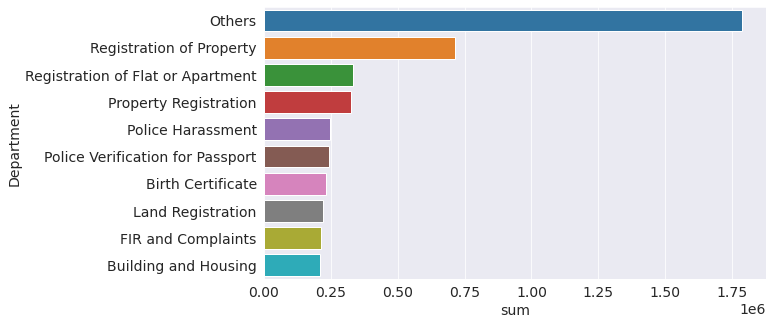

In [28]:
sns.barplot(y=depart_sum.index,x=depart_sum['sum']);

<a id="9"></a> 
# 9- Time Series Analysis ⌚⌛

In [29]:
df_day=df[["Amount(INR)",'Date']].copy()
df_day.head()

,Amount(INR),Date
0,400,2020-10-14
1,350,2020-10-13
2,100,2020-10-13
3,100,2020-10-13
4,15000,2020-10-13


In [30]:
df_day["Day_of_month"]=df["Date"].dt.day
df_day["Week_of_year"]=df["Date"].dt.week
df_day["Year"]=df["Date"].dt.year
df_day["Month"]=df["Date"].dt.month
df_day['Day_of_week']=df['Date'].dt.dayofweek

In [31]:
df_day

,Amount(INR),Date,Day_of_month,Week_of_year,Year,Month,Day_of_week
0,400,2020-10-14,14,42,2020,10,2
1,350,2020-10-13,13,42,2020,10,1
2,100,2020-10-13,13,42,2020,10,1
3,100,2020-10-13,13,42,2020,10,1
4,15000,2020-10-13,13,42,2020,10,1
...,...,...,...,...,...,...,...
3468,33,2015-10-30,30,44,2015,10,4
3469,10,2015-10-30,30,44,2015,10,4
3470,500,2015-10-30,30,44,2015,10,4
3471,800,2015-10-30,30,44,2015,10,4


### Bribes paid by days of the month

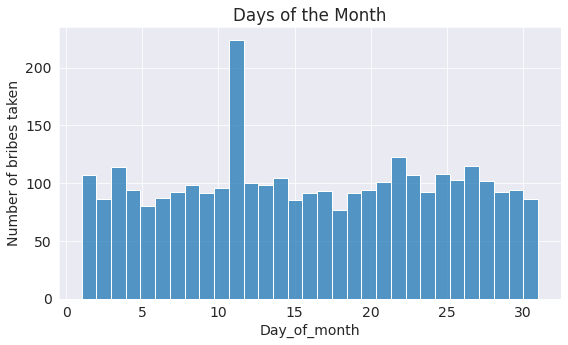

In [32]:
sns.histplot(data=df_day["Day_of_month"],bins=31)
plt.ylabel("Number of bribes taken")
plt.title("Days of the Month");

### Bribes paid by Years

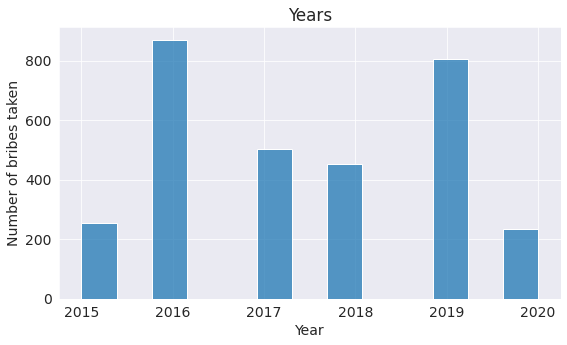

In [33]:
sns.histplot(data=df_day["Year"])
plt.ylabel("Number of bribes taken")
plt.title("Years");

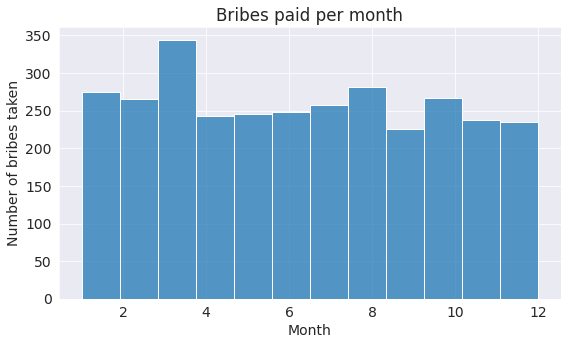

In [34]:
sns.histplot(data=df_day["Month"],bins=12)
plt.ylabel("Number of bribes taken")
plt.title("Bribes paid per month");

**It can be seen that the day of the month doesn't affect it.**

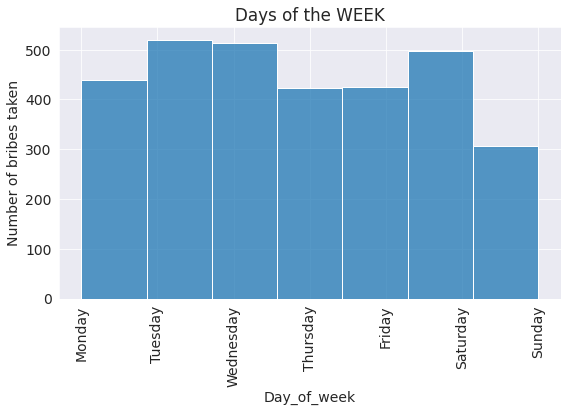

In [35]:
sns.histplot(data=df_day["Day_of_week"],bins=7)
plt.ylabel("Number of bribes taken")
plt.title("Days of the WEEK")
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],rotation=90);

**It is intresting to note that On Sunday bribes are paid less often**

<AxesSubplot:>

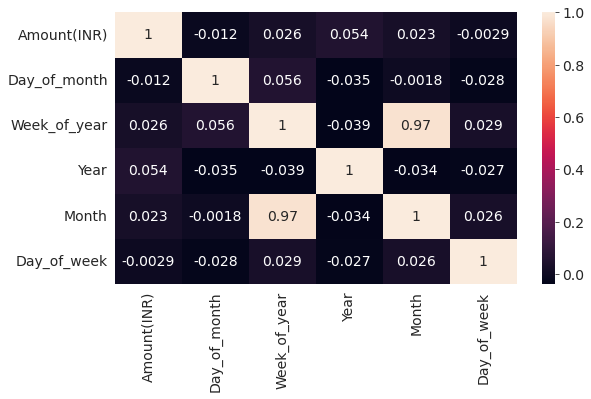

In [36]:
sns.heatmap(df_day.corr(),annot=True)

<a id="10"></a> 
# 10- Conclusion ✨🌠:


*   The amount of bribe taken doesn't affect the number of viewers.
*   In Banglore, the highest and most numbers of bribes are paid.
*   Karnataka is the state where Bribes are paid the most.
*   The Traffic Department gets has the highest bribes taking count.
*   Bribes are taken less frequently on Sundays.
*   Highest number of bribes taking cases are reported in 2016 and 2019.



### <center>Thanks for reading:)</center>
### <center>Upvote! and Leave some suggestions</center>